In [1]:
#Comp7404 project
## Kmeans++
# -*- coding:utf-8 -*-
import numpy as np
import random
from matplotlib import pyplot
x=np.random.rand(50,2)
print(x)     

[[0.23589828 0.32776059]
 [0.17325756 0.95168721]
 [0.28050467 0.85712773]
 [0.20564256 0.44672733]
 [0.97134678 0.88596976]
 [0.50178498 0.27630589]
 [0.35896959 0.87567801]
 [0.6579598  0.96549914]
 [0.67395219 0.73362224]
 [0.81950019 0.75586487]
 [0.63037615 0.00707371]
 [0.75911156 0.57316734]
 [0.74231801 0.76159594]
 [0.83667022 0.23596423]
 [0.65431409 0.2361404 ]
 [0.2789215  0.07458333]
 [0.87249425 0.49625762]
 [0.82007233 0.16670976]
 [0.42437312 0.15276184]
 [0.83767673 0.60459438]
 [0.57506516 0.20655175]
 [0.13551577 0.76473311]
 [0.74865729 0.31695821]
 [0.5800365  0.17838134]
 [0.91771458 0.14545526]
 [0.59465756 0.22449635]
 [0.25371748 0.2207714 ]
 [0.07751177 0.23660492]
 [0.19122196 0.54674533]
 [0.89884162 0.17522013]
 [0.03038467 0.63365176]
 [0.15466866 0.79347428]
 [0.03946649 0.88763267]
 [0.86030015 0.26177649]
 [0.61766341 0.62389811]
 [0.07104236 0.43385146]
 [0.22077247 0.8679314 ]
 [0.36182897 0.83844345]
 [0.34082065 0.31585574]
 [0.77576718 0.49545773]


C:\Users\15214\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


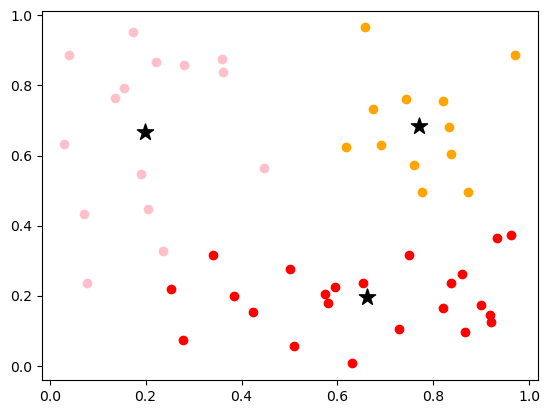

In [2]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters=3
cluster = KMeans(n_clusters=n_clusters,n_init=1).fit(x)
centroid=cluster.cluster_centers_
centroid
y_pred = cluster.labels_#获取训练后对象的每个样本的标签    
centtrod = cluster.cluster_centers_
color=['red','pink','orange','gray','blue']
fig, axi1=pyplot.subplots(1)
for i in range(n_clusters):
    axi1.scatter(x[y_pred==i, 0], x[y_pred==i, 1],
               marker='o',
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='*',c='black',s=150)

In [3]:
print(centtrod)

[[0.66184738 0.1963008 ]
 [0.19888941 0.66838281]
 [0.77107739 0.68405594]]


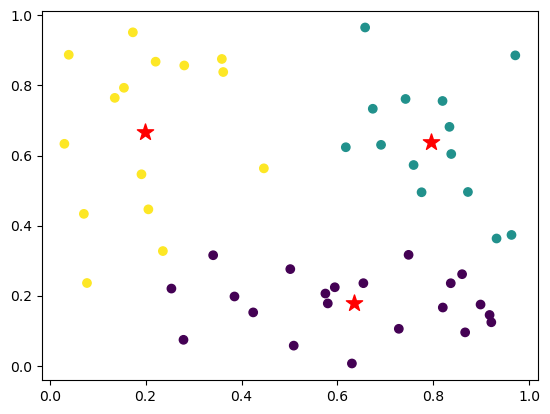

In [4]:



class K_Means(object):
    def __init__(self,k=2,max_iter=300,init='random', tol=0.0001,):
        self.k=k
        self.max_iter=max_iter
        self.clf={}
        self.centroid=[]
        self.init=init
        self.label=[]
        self.tol=tol
    def data_init(self,data):
        if self.init=='random':
            self.data_init_random(data)
        else:
            self.data_init_kmeanpp(data)
    def data_init_random(self,data):
        lista= np.random.choice(np.arange(data.shape[0]),self.k,replace=False)
        self.centroid=data[lista]
        
    def data_init_kmeanpp(self,data):
        #select the first centroid
        lista= np.random.choice(np.arange(data.shape[0]),1)
        #calculate distance from each point to the nearest centroid
        distance=np.zeros(data.shape[0])
        for i in range(1,self.k):
            for j,x in enumerate(data):
                #for each data point compute the distance with the nearest centroid
                distance[j]=np.min([np.linalg.norm(x-data[c])for c in lista])
        #compute the probability according to the distance between each point and its corresponding nearest centroid
        #the point with largest distance weighted the most
            prob=distance**2/np.sum(distance**2)
        #random choose a new centroid index according to the probability
            lista=np.append(lista,np.random.choice(data.shape[0],1,p=prob))
        
        self.centroid=data[lista]
        
    def fit(self,data):
        self.label=np.zeros(data.shape[0],dtype=int)       
        self.data_init(data)
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
                
            for p in range(data.shape[0]):
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(data[p]-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(data[p])
                self.label[p]=clas
               
            pre_centroid=np.array(self.centroid)
            for clas in  list(self.clf.keys()):
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            if np.sum((pre_centroid - self.centroid) ** 2)<=self.tol:
                break
                    

if __name__ == '__main__':
    #x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11],[10,10],[3,8]])
    k_means3 = K_Means(k=3,init='kmeanpp')
    k_means3.fit(x)
    center=np.arange(k_means3.centroid.shape[0])
    pyplot.scatter(x[:,0], x[:,1], c=k_means3.label)
    pyplot.scatter(k_means3.centroid[:,0], k_means3.centroid[:,1], marker='*',c='r', s=150)

    pyplot.show()   

In [5]:
print(x[1])

[0.17325756 0.95168721]


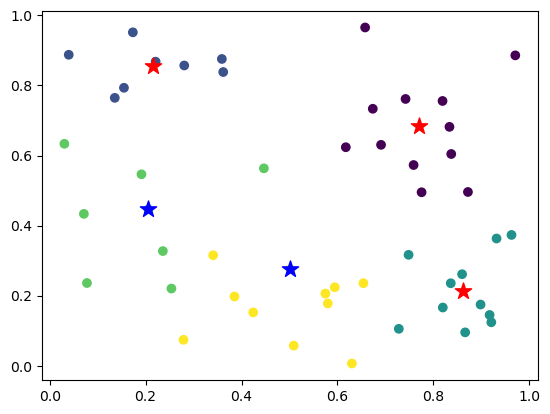

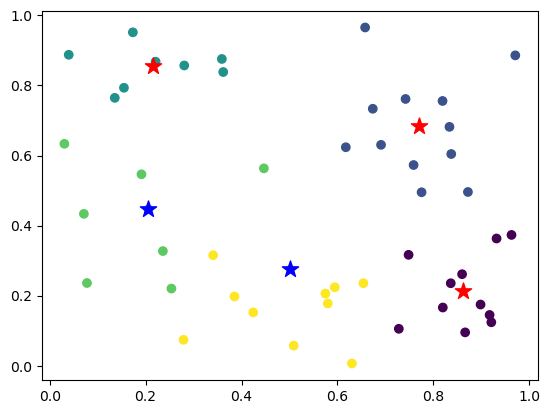

In [6]:
#Comp7404 project
## Kmeans++
# -*- coding:utf-8 -*-
import numpy as np
import random
from matplotlib import pyplot


class FC_K_Means(object):
    def __init__(self,k=2,f=0,max_iter=300,function_type='FC',tol=0.0001):
        self.k=k
        self.max_iter=max_iter
        self.clf={}
        self.centroid=[]
        self.fix_centroid=[]
        self.function_type=function_type
        self.f=f
        self.label=[]
        self.tol=tol
    def fit(self,data,fix_centroid=None):
        if self.function_type=='FC':
            self.FC_kmeans(data,fix_centroid)
        else:
            self.FC_kmeans2(data,fix_centroid)
    def data_init_random(self,data):
        lista= np.random.choice(np.arange(data.shape[0]),self.k,replace=False)
        self.centroid=data[lista]
        
    def data_init_kmeanpp(self,data):
        #select the first centroid
        lista= np.random.choice(np.arange(data.shape[0]),1)
        #calculate distance from each point to the nearest centroid
        distance=np.zeros(data.shape[0])
        for i in range(1,self.k):
            for j,x in enumerate(data):
                #for each data point compute the distance with the nearest centroid
                distance[j]=np.min([np.linalg.norm(x-data[c])for c in lista])
        #compute the probability according to the distance between each point and its corresponding nearest centroid
        #the point with largest distance weighted the most
            prob=distance**2/np.sum(distance**2)
        #random choose a new centroid index according to the probability
            lista=np.append(lista,np.random.choice(data.shape[0],1,p=prob))
        
        self.centroid=data[lista]
        
        
    def FC_kmeans(self,data,fix_centroid):
        #initialize k center by kmeans++
        self.label=np.zeros(data.shape[0],dtype=int)
        self.data_init_kmeanpp(data)
        self.fix_centroid=fix_centroid
        #perform a normal kmeans update in phase I
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
            for p in data:
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(p-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(p)
               
            pre_centroid=np.array(self.centroid)
            for clas in self.clf:
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            if np.sum((pre_centroid - self.centroid) ** 2)<=self.tol:
                break
                    
        #phase II
        #calculate the mean distance from a non-fix center to all fix center
        distance=np.zeros(self.k)
        for i in range(self.k):
            distance[i]=np.average([np.linalg.norm(self.centroid[i]-fix_centroid)for fix_centroid in self.fix_centroid])
        #delete f number of non_fix center which is closest to fix_center
        for i in range(self.f):
            self.centroid=np.delete(self.centroid,np.argmin(distance),0)
            distance=np.delete(distance,np.argmin(distance))
        #merge
        self.centroid=np.concatenate((self.centroid,self.fix_centroid),axis=0)
        
        #compute the normal kmeans for nonfix center
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
            for p in range(data.shape[0]):
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(data[p]-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(data[p])
                self.label[p]=clas
            pre_centroid=np.array(self.centroid)
            for clas in list(self.clf.keys())[:(self.k-self.f)]:
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            if np.sum(np.abs(pre_centroid-self.centroid))==0:
                break
    def FC_kmeans2(self,data,fix_centroid):
        
        #phase I
        #select f number of fix centroid
        self.label=np.zeros(data.shape[0],dtype=int)
        self.fix_centroid=fix_centroid
        lista=np.array([],dtype=int)
        for i in self.fix_centroid:
            lista=np.append(lista,(np.where((data == i).all(1))[0][0]))
        #calculate distance from each point to the nearest centroid
        distance=np.zeros(data.shape[0])
        for i in range(self.f,self.k):
            for j,x in enumerate(data):
                #for each data point compute the distance with the nearest centroid
                distance[j]=np.min([np.linalg.norm(x-data[c])for c in lista])
        #compute the probability according to the distance between each point and its corresponding nearest centroid
        #the point with largest distance weighted the most
            prob=distance**2/np.sum(distance**2)
        #random choose a new centroid index according to the probability
            lista=np.append(lista,np.random.choice(data.shape[0],1,p=prob))
        #merge
        lista=np.concatenate((lista[self.f:self.k],lista[:self.f]),axis=0)
        self.centroid=data[lista]
                    
        #phase II
        #calculate the mean distance from a non-fix center to all fix cente
        
        #compute the normal kmeans for nonfix center
        for i in range(self.max_iter):
            self.clf={}
            for j in range(self.k):
                self.clf[j]=[]
            for p in range(data.shape[0]):
                
                distance=[]
                for centroid in self.centroid:
                    distance.append(np.linalg.norm(data[p]-centroid))
                    
                clas=np.argmin(distance)
                self.clf[clas].append(data[p])
                self.label[p]=clas
            pre_centroid=np.array(self.centroid)
            for clas in list(self.clf.keys())[:(self.k-self.f)]:
                self.centroid[clas]=np.average(self.clf[clas],axis=0)
            ##stop criteria check
            if np.sum((pre_centroid - self.centroid) ** 2)<=self.tol:
                break
                
                
                
                
if __name__ == '__main__':
    fx=[x[3],x[5]]

    k_means = FC_K_Means(k=5,f=2,max_iter=1000,function_type='FC')
    k_means.fit(data=x,fix_centroid=fx)
    center=np.arange(k_means.centroid.shape[0])
    pyplot.scatter(x[:,0], x[:,1], c=k_means.label)
    pyplot.scatter(k_means.centroid[:(k_means.k-k_means.f),0], k_means.centroid[:(k_means.k-k_means.f),1], marker='*',c='r', s=150)
    pyplot.scatter(k_means.centroid[(k_means.k-k_means.f):,0], k_means.centroid[(k_means.k-k_means.f):,1], marker='*',c='b', s=150)    
    pyplot.show()   
    k_means1 = FC_K_Means(k=5,f=2,max_iter=1000,function_type='FC2')
    k_means1.fit(data=x,fix_centroid=fx)
    center=np.arange(k_means1.centroid.shape[0])

    pyplot.scatter(x[:,0], x[:,1], c=k_means1.label)
    pyplot.scatter(k_means1.centroid[:(k_means1.k-k_means1.f),0], k_means1.centroid[:(k_means1.k-k_means1.f),1], marker='*',c='r', s=150)
    pyplot.scatter(k_means1.centroid[(k_means1.k-k_means1.f):,0], k_means1.centroid[(k_means1.k-k_means1.f):,1], marker='*',c='b', s=150)    
    pyplot.show()   
    #print(cat)

In [7]:
print(np.array(k_means1.clf))

{0: [array([0.83667022, 0.23596423]), array([0.82007233, 0.16670976]), array([0.74865729, 0.31695821]), array([0.91771458, 0.14545526]), array([0.89884162, 0.17522013]), array([0.86030015, 0.26177649]), array([0.9212845 , 0.12463331]), array([0.96340978, 0.37375014]), array([0.93222855, 0.36357805]), array([0.72826935, 0.10597196]), array([0.86669325, 0.09581101])], 1: [array([0.97134678, 0.88596976]), array([0.6579598 , 0.96549914]), array([0.67395219, 0.73362224]), array([0.81950019, 0.75586487]), array([0.75911156, 0.57316734]), array([0.74231801, 0.76159594]), array([0.87249425, 0.49625762]), array([0.83767673, 0.60459438]), array([0.61766341, 0.62389811]), array([0.77576718, 0.49545773]), array([0.83396037, 0.68202683]), array([0.69117817, 0.63071732])], 2: [array([0.17325756, 0.95168721]), array([0.28050467, 0.85712773]), array([0.35896959, 0.87567801]), array([0.13551577, 0.76473311]), array([0.15466866, 0.79347428]), array([0.03946649, 0.88763267]), array([0.22077247, 0.8679314

In [8]:

print(k_means3.centroid)

[[0.63461198 0.17988524]
 [0.79632621 0.63899996]
 [0.19888941 0.66838281]]


# Evaluation Measurement

# 1. SSE

In [9]:
def SSE(data, centroids, labels):
    sse = 0
    for i in range(len(data)):
        centroid = centroids[labels[i]]
        squared_distance = np.sum((data[i] - centroid) ** 2)
        sse += squared_distance
    return sse
print(SSE(x,k_means.centroid,k_means.label))

1.2683235866837008


# 2. Davies-Bouldin Index

In [26]:
from sklearn.metrics import davies_bouldin_score


# 3. The Silhouette Index 

In [29]:
from sklearn.metrics import silhouette_score


# Probability Density of Certain region in Uber Data set

In [12]:
import os
data = np.loadtxt(open("C:/Users/15214/OneDrive/COURSE_SLIDES/Comp7404 Computational Intelligence and Machine Learning/uber_raw_data_jun14.csv","rb"),delimiter=",",skiprows=63845,usecols=[1,2])

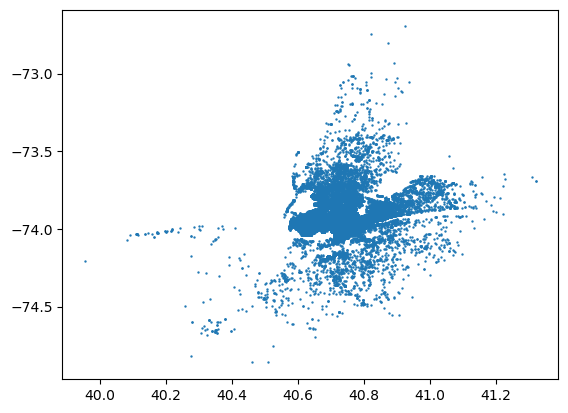

In [13]:
pyplot.scatter(data[:,0],data[:,1],s=0.5)

In [14]:
# select fixpoint

import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.spatial.distance import cdist

def select_nfixpoint(data,n):

    # Create a KernelDensity object and fit the data
    kde = KernelDensity(bandwidth=0.5)
    kde.fit(data)

    # Calculate the logarithm of the estimated density values for each data point
    log_densities = kde.score_samples(data)

    # Sort the data points based on their density values in descending order
    sorted_indices = np.argsort(log_densities)[::-1]

    selected_indices = sorted_indices[:n]


    # Get the selected data points
    selected_data = data[selected_indices]

    # Set a minimum distance threshold between selected points
    min_distance = 0.2

    # Remove any selected points that are closer than the minimum distance
    final_selected_indices = [selected_indices[0]]
    for i in range(1, len(selected_indices)):
        distances = cdist(selected_data[i].reshape(1, -1), data[final_selected_indices])
        if np.min(distances) > min_distance:
            final_selected_indices.append(selected_indices[i])

    
    # Get the final selected data points
    final_selected_data = data[final_selected_indices]
    return final_selected_indices

In [15]:
index=select_nfixpoint(x,5)
print(x[index])

[[0.50178498 0.27630589]
 [0.44665538 0.56369295]
 [0.74865729 0.31695821]]


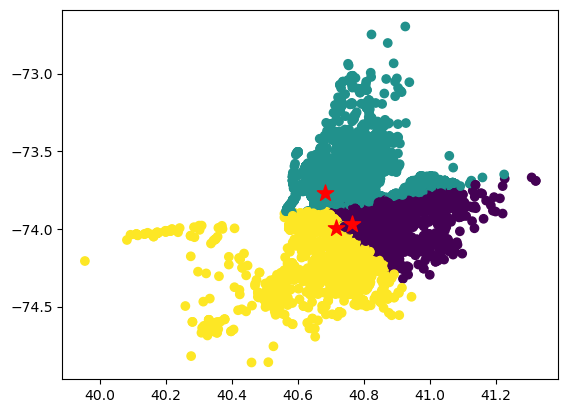

In [40]:
k_meanspp = K_Means(k=3,init='kmeanpp')
k_meanspp.fit(data)
center=np.arange(k_meanspp.centroid.shape[0])
pyplot.scatter(data[:,0], data[:,1], c=k_meanspp.label)
pyplot.scatter(k_meanspp.centroid[:,0], k_meanspp.centroid[:,1], marker='*',c='r', s=150)

pyplot.show()   

In [21]:
print(SSE(data,k_meanspp.centroid,k_meanspp.label))

1287.245565486005


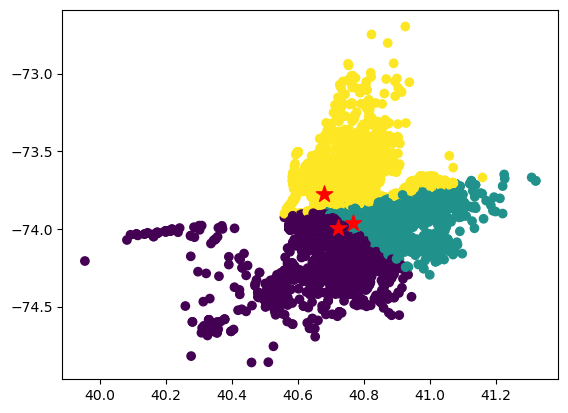

In [39]:
n_clusters=3
cluster = KMeans(n_clusters=n_clusters,n_init=1).fit(data)
centroid=cluster.cluster_centers_
centroid
y_pred = cluster.labels_#获取训练后对象的每个样本的标签    
centtrod = cluster.cluster_centers_
pyplot.scatter(data[:,0], data[:,1], c=y_pred)
pyplot.scatter(centtrod[:,0], centtrod[:,1], marker='*',c='r', s=150)

pyplot.show()  

In [32]:
print(SSE(data,centtrod,y_pred))

40.51404270779157


In [38]:
print(cluster.inertia_)

1284.01655026557
